# Understanding neural_datasets

The purpose of this notebook is to do a "walkthrough" of one of the the brain score datasets, so we can better understand the analysis pipeline. How do we go from "model_identifier" and "benchmark_identifier" to a "brain score"?

In this notebook we'll trace the path for the "'Marques2020_Cavanaugh2002-surround_diameter" benchmark.

# Question 1: What exactly was the Marques2020_Cavanaugh2002-surround_diameter experiment?

https://journals.physiology.org/doi/epdf/10.1152/jn.00692.2001

For all vision experiments, the general experiment is "show animal images" while "recording neural responses". You might also have the animal performing a task (e.g., making a decision about each image), but often for neurophysiology experiments the task is "passive viewing" (stay awake and look at these images).

So, to understand an experiment, you need to ask four sets of questions.

First, you should ask about the "goal" of the experiment
1) What was the goal of the experiment? Usually this can be stated as a question, e.g., "The authors wanted to quantify the size of V1 "classical receptive fields" and the size of the "suppressive surround".

Second, you should ask about the general experiment logic:
1) So how are they going to address this question? e.g., "To address this question, they presented oriented gratings (which elicit strong responses from V1 cells), and varied the size from small to large. They reasoned that responses will increase with size until the "classical receptive field" is filled, and will decrease beyond that size, and should keep decreasing until the "suppressive surround" is filled. (see Figure 1A), and then level off. So by plotting firing rate as a function of stimulus size, and examining the peak and plataues of activation, they could infer the size of the excitatory center and suppressive surround.

Third you should ask about the "stimulus presentation" or "trial design":
1) What was the actual stimulus presentation? (e.g., "The monkey viewed images one at a time, presented for 500ms with a 500ms blank between images.)
2) OK, but how many images? And what did the images look like? How long was a recording session? Did the monkey look at 10000 images straight for 3 hours? 
3) Did the monkey have a task? What was it?
4) What were the "conditions" of the experiment (i.e., what systematic variation was there in the set of images shown)? Note in our example we've somewhat covered this with the "general method" but might be more detailed here...

Fourth, you should ask about the "neural recording":
1) asdf

We recorded the responses of 352 neurons in V1. We onlyincluded neurons in our analysis that ﬁred at least ﬁve spikes/s(334/352 units), and we excluded neurons for which we couldnot determine the CRF boundaries (see following text, 29/334units). Fifty-seven percent of receptive ﬁelds in our samplewere centered within 5° of the fovea, with an additional 9%between 5 and 10°. Eccentricities between 10 and 25° ac-counted for 19% of our data, and the remaining 15% ofreceptive ﬁelds had eccentricities between 25 and 40°. Simpleand complex cells did not respond differently in our experi-ments, and have been pooled for all analyses.



# explore

In [71]:
from brainscore_vision import benchmark_registry
from brainscore_vision import load_dataset, load_metric
from brainscore_vision.metrics.distribution_similarity import NeuronalPropertyCeiling
from brainscore_core.metrics import Metric, Score

In [78]:
ASSEMBLY_NAME = 'Cavanaugh2002a'
# ASSEMBLY_NAME = 'movshon.Cavanaugh2002a'
REGION = 'V1'
TIMEBINS = [(70, 170)]
property_name = 'surround_diameter'
parent = 'V1-surround_modulation'
assembly = load_dataset(ASSEMBLY_NAME)
similarity_metric = load_metric('ks_similarity', property_name=property_name)
ceil_func = NeuronalPropertyCeiling(similarity_metric)
ceil_func

In [66]:
similarity_metric.similarity_func

In [73]:
assembly

<xarray.PropertyAssembly 'movshon.Cavanaugh2002a' (neuroid: 190,
                                                   neuronal_property: 5)>
dask.array<open_dataset-55662569f58c9266191bc1b3b2e10bbamovshon.Cavanaugh2002a, shape=(190, 5), dtype=float64, chunksize=(190, 5), chunktype=numpy.ndarray>
Coordinates:
  * neuroid            (neuroid) MultiIndex
  - neuroid_id         (neuroid) int64 0 1 2 3 4 5 6 ... 184 185 186 187 188 189
  - region             (neuroid) object 'V1' 'V1' 'V1' 'V1' ... 'V1' 'V1' 'V1'
  * neuronal_property  (neuronal_property) object 'surround_suppression_index...
Attributes:
    number_of_trials:                             20
    surround_suppression_index_bins:              [0.  0.2 0.4 0.6 0.8 1.  1....
    strongly_suppressed_bins:                     [0.  0.5 1. ]
    grating_summation_field_bins:                 [ 0.0625  0.125   0.25    0...
    surround_diameter_bins:                       [ 0.0625  0.125   0.25    0...
    surround_grating_summation_field_ratio_bins:  [ 1  2  4  8 16 32]
    stimulus_set_identifier:                      Marques2020_size
    stimulus_set:                                       contrast    radius  f...
    identifier:                                   movshon.Cavanaugh2002a

In [79]:
assembly.loc[:, property_name].values

array([        nan,         nan,         nan,         nan,         nan,
               nan,         nan,         nan,         nan,         nan,
               nan,         nan,         nan,         nan,         nan,
               nan,         nan,         nan,         nan,         nan,
               nan,         nan,         nan,         nan,         nan,
               nan,         nan,         nan,         nan,         nan,
               nan,         nan,         nan,         nan,         nan,
               nan,         nan,         nan,         nan,         nan,
               nan,         nan,  0.28597873,  0.36676548,  0.66390666,
        0.54940476,  0.92944661,  0.5185943 ,  0.71201413,  0.7766628 ,
        0.74752449,  0.71554142,  0.55379052,  0.53761666,  0.77009353,
        0.63115032,  0.80516856,  0.72784988,  0.60514681,  0.71898675,
        0.63814255,  0.51241865,  0.72187896,  0.51014274,  1.03000899,
        1.31700738,  1.4014892 ,  1.46329047,  1.41480722,  1.74

In [75]:
assembly.loc[:, property_name].values

array([        nan,         nan,         nan,         nan,         nan,
               nan,         nan,         nan,         nan,         nan,
               nan,         nan,         nan,         nan,         nan,
               nan,         nan,         nan,         nan,         nan,
               nan,         nan,         nan,         nan,         nan,
               nan,         nan,         nan,         nan,         nan,
               nan,         nan,         nan,         nan,         nan,
               nan,         nan,         nan,         nan,         nan,
               nan,         nan,  0.28597873,  0.36676548,  0.66390666,
        0.54940476,  0.92944661,  0.5185943 ,  0.71201413,  0.7766628 ,
        0.74752449,  0.71554142,  0.55379052,  0.53761666,  0.77009353,
        0.63115032,  0.80516856,  0.72784988,  0.60514681,  0.71898675,
        0.63814255,  0.51241865,  0.72187896,  0.51014274,  1.03000899,
        1.31700738,  1.4014892 ,  1.46329047,  1.41480722,  1.74

In [48]:
model_property = assembly
data_property = assembly
data_property

<xarray.PropertyAssembly 'movshon.Cavanaugh2002a' (neuroid: 190,
                                                   neuronal_property: 5)>
dask.array<open_dataset-55662569f58c9266191bc1b3b2e10bbamovshon.Cavanaugh2002a, shape=(190, 5), dtype=float64, chunksize=(190, 5), chunktype=numpy.ndarray>
Coordinates:
  * neuroid            (neuroid) MultiIndex
  - neuroid_id         (neuroid) int64 0 1 2 3 4 5 6 ... 184 185 186 187 188 189
  - region             (neuroid) object 'V1' 'V1' 'V1' 'V1' ... 'V1' 'V1' 'V1'
  * neuronal_property  (neuronal_property) object 'surround_suppression_index...
Attributes:
    number_of_trials:                             20
    surround_suppression_index_bins:              [0.  0.2 0.4 0.6 0.8 1.  1....
    strongly_suppressed_bins:                     [0.  0.5 1. ]
    grating_summation_field_bins:                 [ 0.0625  0.125   0.25    0...
    surround_diameter_bins:                       [ 0.0625  0.125   0.25    0...
    surround_grating_summation_field_ratio_bins:  [ 1  2  4  8 16 32]
    stimulus_set_identifier:                      Marques2020_size
    stimulus_set:                                       contrast    radius  f...
    identifier:                                   movshon.Cavanaugh2002a

In [49]:
bins = data_property.attrs[property_name + '_bins']
bins

array([ 0.0625,  0.125 ,  0.25  ,  0.5   ,  1.    ,  2.    ,  4.    ,
        8.    , 16.    ])

In [44]:
# data_property.loc[:, property_name].values

In [50]:
data_property = data_property.loc[:, property_name].values
model_property = model_property.loc[:, property_name].values
data_property

array([        nan,         nan,         nan,         nan,         nan,
               nan,         nan,         nan,         nan,         nan,
               nan,         nan,         nan,         nan,         nan,
               nan,         nan,         nan,         nan,         nan,
               nan,         nan,         nan,         nan,         nan,
               nan,         nan,         nan,         nan,         nan,
               nan,         nan,         nan,         nan,         nan,
               nan,         nan,         nan,         nan,         nan,
               nan,         nan,  0.28597873,  0.36676548,  0.66390666,
        0.54940476,  0.92944661,  0.5185943 ,  0.71201413,  0.7766628 ,
        0.74752449,  0.71554142,  0.55379052,  0.53761666,  0.77009353,
        0.63115032,  0.80516856,  0.72784988,  0.60514681,  0.71898675,
        0.63814255,  0.51241865,  0.72187896,  0.51014274,  1.03000899,
        1.31700738,  1.4014892 ,  1.46329047,  1.41480722,  1.74

In [51]:
data_property[data_property < bins[0]] = bins[0]
data_property[data_property > bins[-1]] = bins[-1]
model_property[model_property < bins[0]] = bins[0]
model_property[model_property > bins[-1]] = bins[-1]

In [52]:
n_neurons = data_property.shape[0]
n_neurons

190

[ 0.0625  0.125   0.25    0.5     1.      2.      4.      8.     16.    ]
[0.         0.         0.01351351 0.13513514 0.22297297 0.33108108
 0.27027027 0.02702703]


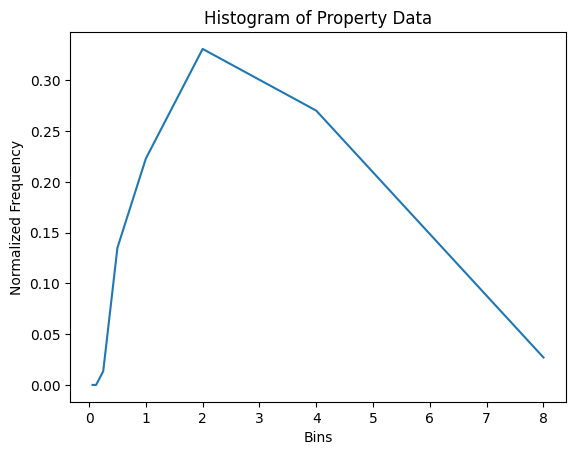

In [57]:
import seaborn as sns
import matplotlib.pyplot as plt

data_hist = np.histogram(data_property, bins=bins)[0]
data_hist = data_hist / data_hist.sum()

# sns.lineplot(x=bins, y=data_hist)
print(bins)
print(data_hist)
plt.plot(bins[:-1], data_hist)  # Use bins[:-1] because np.histogram returns one more bin edge than counts
plt.xlabel('Bins')
plt.ylabel('Normalized Frequency')
plt.title('Histogram of Property Data')
plt.show()

In [63]:
# model_property

In [67]:
similarity_func = similarity_metric.similarity_func
NSAMPLES = 1000
ns = NSAMPLES
model_hist = np.zeros((ns, data_hist.shape[0]))
dist_similarity = np.zeros(ns)
for s in range(ns):
    sample = np.random.choice(model_property, n_neurons)
    model_hist[s, :] = np.histogram(sample, bins=bins)[0]
    model_hist[s, :] = model_hist[s, :] / model_hist[s, :].sum()
    dist_similarity[s] = similarity_func(model_hist[s, :], data_hist)
dist_similarity.shape    

(1000,)

In [69]:
if np.isnan(dist_similarity).sum() > NSAMPLES / 10:
    center = 0
    error = 0
else:
    center = np.nanmean(dist_similarity)
    error = np.nanstd(dist_similarity)
center, error

(0.9550782681122956, 0.020910234857298596)

In [72]:
score = Score(center)
score.attrs['error'] = error
score.attrs[Score.RAW_VALUES_KEY] = dist_similarity
score

<xarray.Score ()>
array(0.95507827)
Attributes:
    error:    0.020910234857298596
    raw:      [0.95634096 0.97217806 0.97828829 0.95985692 0.97667531 0.89274...

In [19]:
ceiling = ceil_func(assembly)
ceiling

<xarray.Score ()>
array(0.95412726)
Attributes:
    error:    0.02107994637232268
    raw:      [0.97084413 0.95945946 0.92944475 0.93366093 0.95334825 0.98751...

In [15]:
similarity_metric(assembly, assembly)

<xarray.Score ()>
array(0.95487284)
Attributes:
    error:    0.021795994539370794
    raw:      [0.93607069 0.9286686  0.95773626 0.94408539 0.96414061 0.96740...

In [ ]:
ceiling

# Question 2: What is the structure and content of the neural_data?

Brainscore uses "xarray", which is a way of storing arrays but with additional metadata about dimensions/attributes of the array.

Let's load the data for the surround_diameter

(OK, I don't understand this dataset, skip to Question2B down below).



In [1]:
import os
import time
import brainscore_vision
from brainscore_vision import score
from PIL import Image
import numpy as np

/n/home02/alvarez/.conda/envs/brainscore/lib/python3.11/site-packages/brainscore_core/metrics/__init__.py:16: FutureWarning: xarray subclass Score should explicitly define __slots__
  class Score(DataAssembly):


In [2]:
property_name = 'surround_diameter'
benchmark_identifier=f'Marques2020_Cavanaugh2002-{property_name}'
neural_data = brainscore_vision.load_dataset("Cavanaugh2002a")
neural_data

<xarray.PropertyAssembly 'movshon.Cavanaugh2002a' (neuroid: 190,
                                                   neuronal_property: 5)>
dask.array<open_dataset-55662569f58c9266191bc1b3b2e10bbamovshon.Cavanaugh2002a, shape=(190, 5), dtype=float64, chunksize=(190, 5), chunktype=numpy.ndarray>
Coordinates:
  * neuroid            (neuroid) MultiIndex
  - neuroid_id         (neuroid) int64 0 1 2 3 4 5 6 ... 184 185 186 187 188 189
  - region             (neuroid) object 'V1' 'V1' 'V1' 'V1' ... 'V1' 'V1' 'V1'
  * neuronal_property  (neuronal_property) object 'surround_suppression_index...
Attributes:
    number_of_trials:                             20
    surround_suppression_index_bins:              [0.  0.2 0.4 0.6 0.8 1.  1....
    strongly_suppressed_bins:                     [0.  0.5 1. ]
    grating_summation_field_bins:                 [ 0.0625  0.125   0.25    0...
    surround_diameter_bins:                       [ 0.0625  0.125   0.25    0...
    surround_grating_summation_field_ratio_bins:  [ 1  2  4  8 16 32]
    stimulus_set_identifier:                      Marques2020_size
    stimulus_set:                                       contrast    radius  f...
    identifier:                                   movshon.Cavanaugh2002a

In [3]:
print(neural_data.dims)
print(neural_data.coords)
print(f"number of neurons: {neural_data.sizes['neuroid_id']}")
# neural_responses = neural_data['neuroid']
# print(neural_responses)

('neuroid', 'neuronal_property')
Coordinates:
  * neuroid            (neuroid) MultiIndex
  - neuroid_id         (neuroid) int64 0 1 2 3 4 5 6 ... 184 185 186 187 188 189
  - region             (neuroid) object 'V1' 'V1' 'V1' 'V1' ... 'V1' 'V1' 'V1'
  * neuronal_property  (neuronal_property) object 'surround_suppression_index...


KeyError: 'neuroid_id'

In [54]:
print(neural_data.data_vars)



AttributeError: 'PropertyAssembly' object has no attribute 'data_vars'

In [47]:
neuroid = 0
neuroid_data = neural_data.sel(neuroid_id=0)
print(neuroid_data)

<xarray.PropertyAssembly 'movshon.Cavanaugh2002a' ()>
dask.array<getitem, shape=(), dtype=float64, chunksize=(), chunktype=numpy.ndarray>
Coordinates:
    neuroid_id         int64 0
    neuronal_property  <U17 'surround_diameter'
Attributes:
    number_of_trials:                             20
    surround_suppression_index_bins:              [0.  0.2 0.4 0.6 0.8 1.  1....
    strongly_suppressed_bins:                     [0.  0.5 1. ]
    grating_summation_field_bins:                 [ 0.0625  0.125   0.25    0...
    surround_diameter_bins:                       [ 0.0625  0.125   0.25    0...
    surround_grating_summation_field_ratio_bins:  [ 1  2  4  8 16 32]
    stimulus_set_identifier:                      Marques2020_size
    stimulus_set:                                       contrast    radius  f...
    identifier:                                   movshon.Cavanaugh2002a


In [53]:
neuroid_data.attrs['surround_suppression_index_bins']

array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ])

In [43]:
for idx in range(190):
    neuroid_data_array = neural_data.sel(neuroid_id=idx).values
    if ~np.isnan(neuroid_data_array): 
        break
neuroid_data_array

array(0.28597873)

In [44]:
neuroid_data_array

array(0.28597873)

In [46]:
# valid_data = neural_data.dropna(dim='neuroid_id', how='any')
# neuroid_data = valid_data.sel(neuroid_id=0)
# print(neuroid_data)

In [14]:
stimulus_set = neural_data.attrs['stimulus_set']
stimulus_set

,contrast,radius,filename,position_y,orientation,phase,image_id,position_x,spatial_frequency,image_file_name,degrees,stimulus_id
0,1.0,0.105112,0.png,0.5,0.0,0.0,0,0.5,0.771105,dicarlo.Marques2020_size_005050112823.png,12,0
1,1.0,0.105112,1.png,0.5,0.0,45.0,1,0.5,0.771105,dicarlo.Marques2020_size_005050112868.png,12,1
2,1.0,0.105112,2.png,0.5,0.0,90.0,2,0.5,0.771105,dicarlo.Marques2020_size_005050112913.png,12,2
3,1.0,0.105112,3.png,0.5,0.0,135.0,3,0.5,0.771105,dicarlo.Marques2020_size_005050112958.png,12,3
4,1.0,0.105112,4.png,0.5,0.0,180.0,4,0.5,0.771105,dicarlo.Marques2020_size_005050113003.png,12,4
...,...,...,...,...,...,...,...,...,...,...,...,...
2299,1.0,4.756828,2299.png,0.5,150.0,135.0,2299,0.5,6.168843,dicarlo.Marques2020_size_005054833651.png,12,2299
2300,1.0,4.756828,2300.png,0.5,150.0,180.0,2300,0.5,6.168843,dicarlo.Marques2020_size_005054833696.png,12,2300
2301,1.0,4.756828,2301.png,0.5,150.0,225.0,2301,0.5,6.168843,dicarlo.Marques2020_size_005054833741.png,12,2301
2302,1.0,4.756828,2302.png,0.5,150.0,270.0,2302,0.5,6.168843,dicarlo.Marques2020_size_005054833786.png,12,2302


In [23]:
len(stimulus_set.image_file_name.unique())

2304

In [15]:
df.iloc[0]

contrast                                                   1.0
radius                                                0.105112
filename                                                 0.png
position_y                                                 0.5
orientation                                                0.0
phase                                                      0.0
image_id                                                     0
position_x                                                 0.5
spatial_frequency                                     0.771105
image_file_name      dicarlo.Marques2020_size_005050112823.png
degrees                                                     12
stimulus_id                                                  0
Name: 0, dtype: object

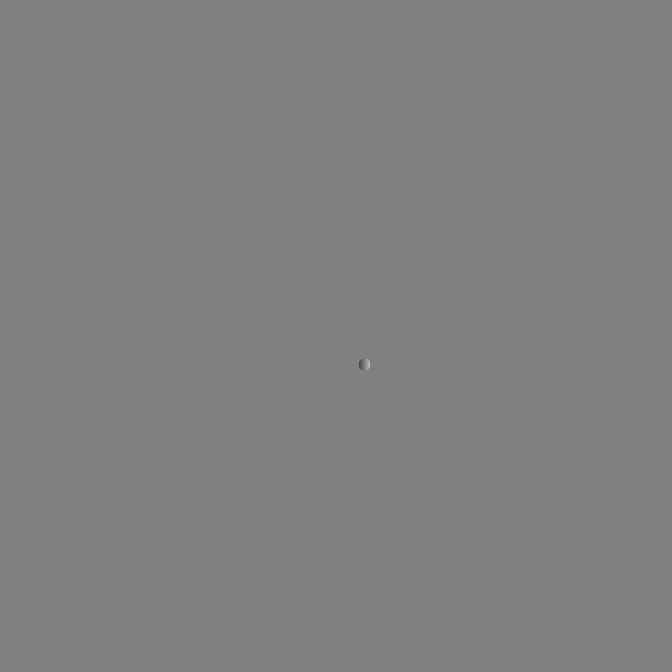

In [19]:
local_path = stimulus_set.get_stimulus(stimulus_set['stimulus_id'].values[0])
Image.open(local_path)

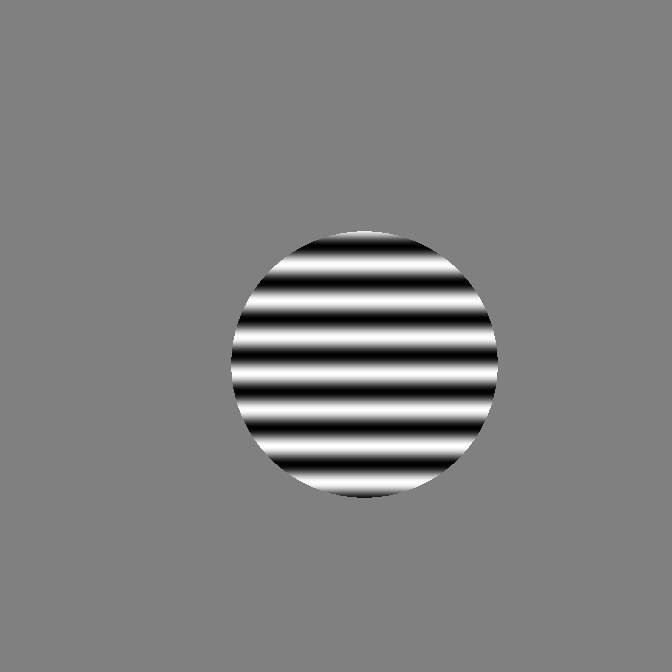

In [21]:
local_path = stimulus_set.get_stimulus(stimulus_set['stimulus_id'].values[1800])
Image.open(local_path)

In [6]:
from brainscore_vision import data_registry

data_registry

{'Cavanaugh2002a': <function brainscore_vision.data.marques2020.<lambda>()>,
 'FreemanZiemba2013_V1_properties': <function brainscore_vision.data.marques2020.<lambda>()>,
 'DeValois1982a': <function brainscore_vision.data.marques2020.<lambda>()>,
 'DeValois1982b': <function brainscore_vision.data.marques2020.<lambda>()>,
 'Ringach2002': <function brainscore_vision.data.marques2020.<lambda>()>,
 'Schiller1976c': <function brainscore_vision.data.marques2020.<lambda>()>}

In [7]:
data = data_registry['Cavanaugh2002a']()
neural_data = data.sel(neuronal_property='surround_diameter', region='V1')
neural_data

<xarray.PropertyAssembly 'movshon.Cavanaugh2002a' (neuroid_id: 190)>
dask.array<getitem, shape=(190,), dtype=float64, chunksize=(190,), chunktype=numpy.ndarray>
Coordinates:
  * neuroid_id         (neuroid_id) int64 0 1 2 3 4 5 ... 185 186 187 188 189
    neuronal_property  <U17 'surround_diameter'
Attributes:
    number_of_trials:                             20
    surround_suppression_index_bins:              [0.  0.2 0.4 0.6 0.8 1.  1....
    strongly_suppressed_bins:                     [0.  0.5 1. ]
    grating_summation_field_bins:                 [ 0.0625  0.125   0.25    0...
    surround_diameter_bins:                       [ 0.0625  0.125   0.25    0...
    surround_grating_summation_field_ratio_bins:  [ 1  2  4  8 16 32]
    stimulus_set_identifier:                      Marques2020_size
    stimulus_set:                                       contrast    radius  f...
    identifier:                                   movshon.Cavanaugh2002a

In [87]:
data = data_registry['Cavanaugh2002a']()
neural_data = data.sel(neuronal_property='surround_diameter', region='V1')
neural_data

<xarray.PropertyAssembly 'movshon.Cavanaugh2002a' (neuroid_id: 190)>
dask.array<getitem, shape=(190,), dtype=float64, chunksize=(190,), chunktype=numpy.ndarray>
Coordinates:
  * neuroid_id         (neuroid_id) int64 0 1 2 3 4 5 ... 185 186 187 188 189
    neuronal_property  <U17 'surround_diameter'
Attributes:
    number_of_trials:                             20
    surround_suppression_index_bins:              [0.  0.2 0.4 0.6 0.8 1.  1....
    strongly_suppressed_bins:                     [0.  0.5 1. ]
    grating_summation_field_bins:                 [ 0.0625  0.125   0.25    0...
    surround_diameter_bins:                       [ 0.0625  0.125   0.25    0...
    surround_grating_summation_field_ratio_bins:  [ 1  2  4  8 16 32]
    stimulus_set_identifier:                      Marques2020_size
    stimulus_set:                                       contrast    radius  f...
    identifier:                                   movshon.Cavanaugh2002a

In [63]:
from brainscore_vision.benchmark_helpers.neural_common import average_repetition

benchmark_data = neural_data.sel(region='V1')  # (1)
benchmark_data

<xarray.PropertyAssembly 'movshon.Cavanaugh2002a' (neuroid_id: 190,
                                                   neuronal_property: 5)>
dask.array<open_dataset-55662569f58c9266191bc1b3b2e10bbamovshon.Cavanaugh2002a, shape=(190, 5), dtype=float64, chunksize=(190, 5), chunktype=numpy.ndarray>
Coordinates:
  * neuroid_id         (neuroid_id) int64 0 1 2 3 4 5 ... 185 186 187 188 189
  * neuronal_property  (neuronal_property) object 'surround_suppression_index...
Attributes:
    number_of_trials:                             20
    surround_suppression_index_bins:              [0.  0.2 0.4 0.6 0.8 1.  1....
    strongly_suppressed_bins:                     [0.  0.5 1. ]
    grating_summation_field_bins:                 [ 0.0625  0.125   0.25    0...
    surround_diameter_bins:                       [ 0.0625  0.125   0.25    0...
    surround_grating_summation_field_ratio_bins:  [ 1  2  4  8 16 32]
    stimulus_set_identifier:                      Marques2020_size
    stimulus_set:                                       contrast    radius  f...
    identifier:                                   movshon.Cavanaugh2002a

In [66]:
average_repetition??

Signature: average_repetition(assembly)
Docstring: <no docstring>
Source:   
def average_repetition(assembly):
    def avg_repr(assembly):
        presentation_coords = [coord for coord, dims, values in walk_coords(assembly)
                               if array_is_element(dims, 'presentation') and coord != 'repetition']
        assembly = assembly.multi_groupby(presentation_coords).mean(dim='presentation', skipna=True)
        return assembly

    return apply_keep_attrs(assembly, avg_repr)
File:      /n/holylabs/LABS/alvarez_lab/Users/alvarez/Projects/vision/brainscore_vision/benchmark_helpers/neural_common.py
Type:      function

In [67]:
benchmark_data.stimulus_set_identifier

'Marques2020_size'